# Geospatial Analysis Notebook

### Importing pandas and reading the dataset

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.00,C50811,Malignant neoplasm of ovrlp sites of right fem...,...,18.858696,11.426087,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,0.255319,2.234043,1.182979,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,3.588679,7.915094,21.064151,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,11.645455,10.081818,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,9.184211,6.089474,18.960526,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,728161,NaN,COMMERCIAL,MO,653,52,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,1.029032,3.232258,3.632258,18.767742,13.967742,1.316129,25.770968,9.787097,9.780645,25
27670,203896,NaN,COMMERCIAL,IN,462,39,F,NaN,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,3.510811,5.362162,9.562162,12.751351,14.489189,2.813514,23.686111,8.537838,6.191892,22
27671,740115,Hispanic,MEDICAID,TX,769,41,F,NaN,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,10.117391,6.691304,32.408696,11.359091,12.080952,4.050000,21.588889,16.104545,9.513043,28
27672,122759,NaN,COMMERCIAL,AZ,853,53,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,6.671014,11.608696,35.059420,17.285294,16.342647,4.460294,26.421875,11.176471,12.642029,169


### Listing columns present in the dataset

In [4]:
train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'region', 'division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_5

## Preprocessing the dataset 

### Reading zip_3 dataset

In [5]:
zip3_county = pd.read_csv("Zip3_County-CSV.csv",encoding='ISO-8859-1')
print(zip3_county.columns)

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'POPULATION',
       'POP_SQMI', 'POP2010', 'POP10_SQMI', 'MALES', 'FEMALES', 'AGE_UNDER5',
       'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
       'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'NO_FARMS12',
       'AVE_SIZE12', 'CROP_ACR12', 'no_hsdip', 'no_college', 'female_hd',
       'foodstmp', 'home_val', 'income', 'GINI', 'povpct', 'unemploy',
       'perc_aian', 'perc_api', 'perc_black', 'perc_white', 'perc_hisp',
       'perc_65up', 'total_pop', 'airqual', 'parks', 'sev_housin', 'pctui',
       'medicaid', 'OCArea_ha', 'ZCTA3C', 'Z3OTotArea', 'Z3OrigArea',
       'PctCntyZ3', 'IntrsctAr'],
      dtype='object')


 ### State Correction Based on ZIP Codes

In [6]:
import pandas as pd

# Assuming zip3_county and train DataFrames are already loaded

# State abbreviations dictionary
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY"
}

# Convert full state names to abbreviations in zip3_county
zip3_county['STATE_NAME'] = zip3_county['STATE_NAME'].map(state_abbreviations)

# Ensure ZIP3 codes are strings with leading zeros
train['patient_zip3'] = train['patient_zip3'].astype(str).str.zfill(3)
zip3_county['ZCTA3C'] = zip3_county['ZCTA3C'].astype(str)

# Create a dictionary mapping ZIP3 to a list of possible states
zip3_to_states_dict = zip3_county.groupby('ZCTA3C')['STATE_NAME'].apply(list).to_dict()

# Function to correct the state
def correct_state(row):
    patient_zip3 = row['patient_zip3']
    original_state = row['patient_state']  # Replace with your actual column name
    possible_states = zip3_to_states_dict.get(patient_zip3, [])

    # If original state is in the list of possible states, keep it
    if original_state in possible_states:
        return original_state
    else:
        # If the ZIP3 is not found or state does not match, check for most common state in train data
        most_common_state = train[train['patient_zip3'] == patient_zip3]['patient_state'].mode()
        return most_common_state.iloc[0] if not most_common_state.empty else None

# Apply the function to each row in the train dataset
train['corrected_state'] = train.apply(correct_state, axis=1)

# Save the updated DataFrame
train.to_csv('updated_train.csv', index=False)


The above code, A dictionary is made with correct zip codes. For a correction step to verify or correct state entries, this dictionary is used, with the step defaulting to the most common state when there is ambiguity. The use of such a dictionary enables a very reliable correction, which is demonstrated by two common accuracy measures. The corrected states are saved in a new column, and the updated dataset is exported to 'updated_train.csv', ensuring each patient's state aligns correctly with their ZIP code to improve the reliability of regional analyses.

# Geospatial analysis- Spatial autocorrelation & Geographically Weighted Regression

### Installing pysal lib package

In [7]:
pip install pysal==2.0.0

Note: you may need to restart the kernel to use updated packages.


### Installing esda library package

In [8]:
pip install esda

Note: you may need to restart the kernel to use updated packages.


### Installing splot library package

In [9]:
pip install splot --ignore-installed 

  Using cached https://files.pythonhosted.org/packages/2b/1d/088c7ef6c29f9153da0df211b0cacb6885ae10effd3dbed205b877e69b14/splot-1.1.5.post1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/11/09/aa8f068105c4ba5c0cb8093b021ace51ea1fc72308eed52427403cc8fa8e/libpysal-4.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ad/62/7b662284352867a86acfb636761ba351723fc3a235efd8397578d903413d/matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/51/a2/0fbdec8bc6e5dbafe5c775c069403b8cf4a26d650e7b1c256148cbf7ec6a/giddy-2.3.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a6/92/5ddb9aab70fcca4b35e4b0b7ba1c1f994873cb13b139f4846a621bbcc936/geopandas-0.10.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8f/2e/17bbb83fbf102687bb2aa3d808add39da820a7698159302a1a69bb82e01c/seaborn-0.12.2-py3-none-any.whl
  Using cached https://files.py

### Installing mgwr package

In [10]:
pip install mgwr

Note: you may need to restart the kernel to use updated packages.


### Importing all necessary packages 

In [11]:
import geopandas as gp
import seaborn as sbn
import pandas as pd
import numpy as np
import pysal
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Polygon
from pysal.lib import cg as geometry
from pysal.lib import weights

### Reading three_dig_zip.shp file: This dataset consists of three digit zip with polygon geometry

In [12]:
df_zip=gp.read_file("three_dig_zips.shp")

In [13]:
df_zip

,3dig_zip,geometry
0,032,"POLYGON ((-71.66777 43.15253, -71.63490 43.033..."
1,033,"POLYGON ((-71.62792 43.16028, -71.60296 43.165..."
2,034,"POLYGON ((-71.94428 42.78841, -71.92902 42.712..."
3,035,"POLYGON ((-71.53762 44.19750, -71.58151 44.112..."
4,281,"MULTIPOLYGON (((-79.96892 34.80745, -80.79754 ..."
...,...,...
891,156,"MULTIPOLYGON (((-79.40342 40.04460, -79.36451 ..."
892,036,"POLYGON ((-72.46736 43.05265, -72.43532 43.083..."
893,037,"POLYGON ((-72.07863 43.33859, -72.09015 43.322..."
894,038,"MULTIPOLYGON (((-71.09232 42.95919, -71.08518 ..."


### Integrating the WIDS dataset with three_dig.shp dataset- Merging Geographic Data with Patient ZIP Codes

In [14]:

train['patient_zip3'] = train['patient_zip3'].astype(str)
df_zip['3dig_zip'] = df_zip['3dig_zip'].astype(str)


wids_geo = train.merge(df_zip[['3dig_zip', 'geometry']], left_on='patient_zip3', right_on='3dig_zip', how='left')


wids_geo.drop(columns=['3dig_zip'], inplace=True)


In [15]:
wids_geo


,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,treatment_pd,corrected_state,geometry
0,994155,Asian,COMMERCIAL,CA,917,46,F,27.00,C50811,Malignant neoplasm of ovrlp sites of right fem...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,35,CA,"POLYGON ((-117.57547 33.98308, -117.61039 33.9..."
1,154389,NaN,MEDICARE ADVANTAGE,OH,451,63,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,1.182979,18.317021,13.546809,0.146809,31.890909,7.631915,9.631915,33,OH,"POLYGON ((-84.13151 38.78824, -84.20559 38.802..."
2,387343,NaN,COMMERCIAL,TX,773,53,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,21.064151,14.083019,11.943396,2.549057,32.556250,16.396226,10.392453,24,TX,"POLYGON ((-95.07260 30.10305, -95.03569 30.005..."
3,921275,Hispanic,MEDICAID,CA,928,50,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,37.948485,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,455,CA,"MULTIPOLYGON (((-117.89473 33.77448, -117.8948..."
4,803454,NaN,COMMERCIAL,NY,112,39,F,18.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,18.960526,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,162,NY,"POLYGON ((-74.01300 40.57817, -73.98824 40.579..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,728161,NaN,COMMERCIAL,MO,653,52,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,3.632258,18.767742,13.967742,1.316129,25.770968,9.787097,9.780645,25,MO,"POLYGON ((-93.01689 38.20780, -93.02240 38.199..."
27670,203896,NaN,COMMERCIAL,IN,462,39,F,NaN,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,9.562162,12.751351,14.489189,2.813514,23.686111,8.537838,6.191892,22,IN,"MULTIPOLYGON (((-85.95173 39.69705, -85.94157 ..."
27671,740115,Hispanic,MEDICAID,TX,769,41,F,NaN,C50812,Malignant neoplasm of ovrlp sites of left fema...,...,32.408696,11.359091,12.080952,4.050000,21.588889,16.104545,9.513043,28,TX,"POLYGON ((-101.01708 30.12015, -100.99782 30.1..."
27672,122759,NaN,COMMERCIAL,AZ,853,53,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,35.059420,17.285294,16.342647,4.460294,26.421875,11.176471,12.642029,169,AZ,"MULTIPOLYGON (((-112.73938 31.85624, -113.0830..."


As observed above with corresponding patient_zip the new columns, lalitudes and longitudes are added! 

### Printing the type of dataset 

In [16]:
print(type(wids_geo))
print(wids_geo.geometry.head())

<class 'pandas.core.frame.DataFrame'>
0    POLYGON ((-117.57547 33.98308, -117.61039 33.9...
1    POLYGON ((-84.13151 38.78824, -84.20559 38.802...
2    POLYGON ((-95.07260 30.10305, -95.03569 30.005...
3    MULTIPOLYGON (((-117.89473 33.77448, -117.8948...
4    POLYGON ((-74.01300 40.57817, -73.98824 40.579...
Name: geometry, dtype: geometry


### Converting the dataframe to geodataframe to do geospatial Analysis

In [17]:
import geopandas as gpd

wids_geo = gpd.GeoDataFrame(wids_geo, geometry='geometry')
    

print(type(wids_geo))



<class 'geopandas.geodataframe.GeoDataFrame'>


In [18]:
wids_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 27674 entries, 0 to 27673
Data columns (total 85 columns):
patient_id                               27674 non-null int64
patient_race                             12522 non-null object
payer_type                               24838 non-null object
patient_state                            27595 non-null object
patient_zip3                             27674 non-null object
patient_age                              27674 non-null int64
patient_gender                           27674 non-null object
bmi                                      8749 non-null float64
breast_cancer_diagnosis_code             27674 non-null object
breast_cancer_diagnosis_desc             27674 non-null object
breast_cancer_diagnosis_year             27674 non-null int64
metastatic_cancer_diagnosis_code         27674 non-null object
metastatic_first_treatment               27674 non-null object
metastatic_first_treatment_type          16650 non-null object
meta

### Performing geospatial analysis on the whole dataset

Since the socio-economic variables are zip_3 level and treatment_pd(target_pd) is patient_level due to the aggregating the dataset to zip level is important. I have aggregated the dataset to find median of all these variables since the dataset is right skewed and taking a median would be a better choice for the analysis.

In [19]:
wids_data_agg = wids_geo.groupby('patient_zip3').agg({
    'treatment_pd': 'median', 
    'patient_age':'median',
    'poverty': 'median',  
    'unemployment_rate': 'median',
    'health_uninsured': 'median',
    'home_value': 'median',
    'commute_time': 'median',
    'family_size':'median',
    'labor_force_participation':'median',
    'income_household_50_to_75':'median',
    'rent_burden':'median',
    'widowed':'median',
    'geometry': 'first'  
}).reset_index()


### Printing the dataset

In [20]:
wids_data_agg

,patient_zip3,treatment_pd,patient_age,poverty,unemployment_rate,health_uninsured,home_value,commute_time,family_size,labor_force_participation,income_household_50_to_75,rent_burden,widowed,geometry
0,006,113.0,66.0,48.931818,16.821739,5.463043,98362.90698,26.651111,3.513478,39.136957,8.476087,45.904651,8.343182,"MULTIPOLYGON (((-66.69825 18.13060, -66.67812 ..."
1,007,118.0,61.0,46.656522,13.663043,6.780435,101845.34090,28.020000,3.521087,41.367391,9.467391,45.002326,7.930435,"MULTIPOLYGON (((-66.02263 17.98307, -66.01960 ..."
2,009,92.5,66.0,37.405128,17.192308,9.071795,159144.08570,26.740541,3.300000,51.264103,11.168421,47.208571,7.679487,"POLYGON ((-66.21307 18.30700, -66.20591 18.306..."
3,010,84.0,55.0,8.687097,5.020968,2.351613,271111.98080,28.138596,2.883934,62.798387,16.270968,30.090476,6.909677,"MULTIPOLYGON (((-72.58316 42.13977, -72.61930 ..."
4,011,45.0,58.0,23.650000,8.725000,2.983333,191702.08330,21.716667,3.161667,57.508333,14.633333,44.775000,4.991667,"POLYGON ((-72.60825 42.03831, -72.58269 42.081..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,993,71.0,50.0,12.734286,5.457143,10.665714,229020.00000,22.027273,3.368571,59.768571,20.045714,26.219231,3.822857,"POLYGON ((-120.55054 45.74075, -120.50838 45.7..."
845,994,179.0,56.0,8.066667,2.600000,6.766667,256003.33330,19.900000,3.650000,56.600000,25.633333,31.200000,8.700000,"POLYGON ((-117.47999 46.12199, -117.41948 46.1..."
846,995,170.0,54.0,17.176364,11.650909,20.080000,241157.10000,12.460784,3.650000,65.380000,16.916667,25.748148,5.109091,"MULTIPOLYGON (((-176.68471 51.81562, -176.6675..."
847,996,38.0,56.0,22.716667,16.991667,22.964286,177189.69230,13.722078,3.940000,61.997619,17.251807,24.619149,5.354762,"MULTIPOLYGON (((-169.11585 52.82213, -169.1073..."


### checking the mean of treatment_pd when aggregated to zip _3 level

In [21]:
wids_data_agg['treatment_pd'].mean()

76.21672555948174


### checking the mean of treatment_pd when aggregated to zip _3 level

In [22]:
wids_data_agg['patient_age'].mean()

54.6454652532391

In [23]:
print(type(wids_data_agg))
print(wids_data_agg.geometry.head())

<class 'pandas.core.frame.DataFrame'>
0    MULTIPOLYGON (((-66.69825 18.13060, -66.67812 ...
1    MULTIPOLYGON (((-66.02263 17.98307, -66.01960 ...
2    POLYGON ((-66.21307 18.30700, -66.20591 18.306...
3    MULTIPOLYGON (((-72.58316 42.13977, -72.61930 ...
4    POLYGON ((-72.60825 42.03831, -72.58269 42.081...
Name: geometry, dtype: geometry


### Again changing the dataframe to geopandas dataframe after aggregrating to perfrom geospatial analysis

In [24]:
wids_data_agg = gpd.GeoDataFrame(wids_data_agg, geometry='geometry')
print(type(wids_data_agg))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Extracting Geographical Coordinates from Polygon Centroids

First centriods are generated from the polygon column and then from those centroids we would be able to extract the latitudes and longitudes

In [25]:
import geopandas as gpd


centroids = wids_data_agg['geometry'].centroid

# Extract longitude and latitude from the centroids
wids_data_agg['longitude'] = centroids.x
wids_data_agg['latitude'] = centroids.y


In [26]:
wids_data_agg

,patient_zip3,treatment_pd,patient_age,poverty,unemployment_rate,health_uninsured,home_value,commute_time,family_size,labor_force_participation,income_household_50_to_75,rent_burden,widowed,geometry,longitude,latitude
0,006,113.0,66.0,48.931818,16.821739,5.463043,98362.90698,26.651111,3.513478,39.136957,8.476087,45.904651,8.343182,"MULTIPOLYGON (((-66.69825 18.13060, -66.67812 ...",-66.844898,18.258238
1,007,118.0,61.0,46.656522,13.663043,6.780435,101845.34090,28.020000,3.521087,41.367391,9.467391,45.002326,7.930435,"MULTIPOLYGON (((-66.02263 17.98307, -66.01960 ...",-66.124720,18.159445
2,009,92.5,66.0,37.405128,17.192308,9.071795,159144.08570,26.740541,3.300000,51.264103,11.168421,47.208571,7.679487,"POLYGON ((-66.21307 18.30700, -66.20591 18.306...",-66.101620,18.369798
3,010,84.0,55.0,8.687097,5.020968,2.351613,271111.98080,28.138596,2.883934,62.798387,16.270968,30.090476,6.909677,"MULTIPOLYGON (((-72.58316 42.13977, -72.61930 ...",-72.599263,42.254950
4,011,45.0,58.0,23.650000,8.725000,2.983333,191702.08330,21.716667,3.161667,57.508333,14.633333,44.775000,4.991667,"POLYGON ((-72.60825 42.03831, -72.58269 42.081...",-72.546537,42.100089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,993,71.0,50.0,12.734286,5.457143,10.665714,229020.00000,22.027273,3.368571,59.768571,20.045714,26.219231,3.822857,"POLYGON ((-120.55054 45.74075, -120.50838 45.7...",-118.823412,46.393713
845,994,179.0,56.0,8.066667,2.600000,6.766667,256003.33330,19.900000,3.650000,56.600000,25.633333,31.200000,8.700000,"POLYGON ((-117.47999 46.12199, -117.41948 46.1...",-117.206543,46.199767
846,995,170.0,54.0,17.176364,11.650909,20.080000,241157.10000,12.460784,3.650000,65.380000,16.916667,25.748148,5.109091,"MULTIPOLYGON (((-176.68471 51.81562, -176.6675...",-149.703919,63.552689
847,996,38.0,56.0,22.716667,16.991667,22.964286,177189.69230,13.722078,3.940000,61.997619,17.251807,24.619149,5.354762,"MULTIPOLYGON (((-169.11585 52.82213, -169.1073...",-153.212524,60.788818


## Performing Spatial Autocorrelation

In [27]:
import matplotlib.pyplot as plt

from libpysal.weights.contiguity import Queen
from libpysal import examples

import seaborn as sbn
from pysal.viz import splot
import pandas as pd
import numpy as np
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

### Performing spatial autocorrelation (Morans I) on Treatment_pd

Spatial autocorrelation, in the context of geospatial analysis, is a useful statistical method for checking whether the pattern revealed in one region is the same as that in its neighboring regions. In case of treatment_pd, it can be used to see if we have similar treatment durations in one geographical location as in the neighboring locations which will potentially reveal geographical factors or even local customs that influence treatment outcome.

Moran's I is a popular measure of spatial autocorrelation that works by comparing a location's feature value relative to the feature values of neighboring locations, like treatment_pd. The Moran’s I values range between -1 (perfect dispersion) and +1 (perfect correlation), with 0 indicating random distribution. A positive Moran's I suggests that locations with similar values are clustered together (high values near high, or low near low), and negative Moran's I suggests a dispersed pattern where high values may be surrounded by low values.

In [28]:
df_db_fv = wids_data_agg.set_index("treatment_pd", drop=False)

In the above code, for wids_data_agg dataframe, we modify the table’s index to be on the “treatment_pd” column. This operation does not drop the “treatment_pd” column from the DataFrame. “treatment_pd” remains in the table as a column, but it is now also the table’s index. This means that “treatment_pd” serves as an index for row identification. At the same time, “treatment_pd” is still a regular column of the DataFrame which can be accessed and manipulated like any other column of the DataFrame.

### Checking the dataframe's coordinate reference system

In [29]:

df_db_fv.crs

### changing the CRS

In [30]:

df_db_fv.crs = "EPSG:4326"


df_db2_fv = df_db_fv.to_crs(epsg=3857)


In [31]:
len(df_db2_fv.index)

849

### Importing following libraries to perfrom queen's contiguity

In [32]:
from libpysal.weights.contiguity import Queen
from libpysal import examples

import seaborn as sbn
from pysal.viz import splot

### lets calculate the spatial weights matrix using the Queen definiiton of spatial relationships

In [33]:
df_w_fv= Queen.from_dataframe(df_db2_fv)

/opt/conda/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 2 islands with ids: 78, 848.
  warnings.warn(message)


### Row transformation

In [34]:
df_w_fv.transform = 'R'

('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 848, ' is an island (no neighbors)')


### Calculating y array

In [35]:
df_y_fv = df_db2_fv['treatment_pd']
df_y_fv

treatment_pd
113.0    113.0
118.0    118.0
92.5      92.5
84.0      84.0
45.0      45.0
         ...  
71.0      71.0
179.0    179.0
170.0    170.0
38.0      38.0
56.5      56.5
Name: treatment_pd, Length: 849, dtype: float64

In [36]:
# calculating spatial lag
df_db2_fv['lag_fv'] = weights.lag_spatial(df_w_fv,df_y_fv)

### Importing libraries for performing moran's I

In [37]:
import geopandas as gpd
import pandas as pd
import numpy as np
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed

### Now calculating  **global measure** of spatial autocorrelation - **Moran's I** 

In [38]:
morani_fv = esda.Moran(df_db2_fv['lag_fv'], df_w_fv)
morani_fv

In [39]:
round(morani_fv.I, 3)

0.31

In [40]:
morani_fv.p_sim

0.001

### Since We have strong values of moran's I and p-value , let's run LISA- Local indicator of spatial autocorrelation

In [41]:
lisa = esda.Moran_Local(df_db2_fv['lag_fv'], df_w_fv)

/opt/conda/lib/python3.7/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [42]:

print(df_db2_fv.crs)


print(df_db2_fv.total_bounds)

{'init': 'epsg:3857', 'no_defs': True}
[-19668452.17079619  -1617129.97117513  -7262941.54773829
  11237099.99870705]


In [43]:
df_db2_fv = df_db2_fv.to_crs(epsg=4326)

In [44]:

df_db2_fv['significant'] = lisa.p_sim < 0.05

In [45]:

df_db2_fv['quad'] = lisa.q

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


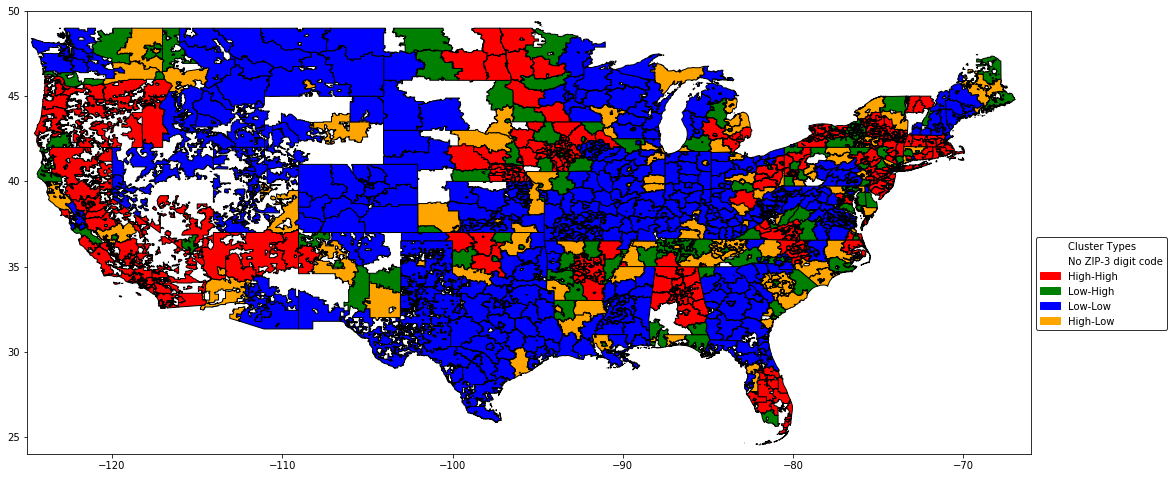

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from geopandas import GeoDataFrame


color_for_class = {
    'NaN': 'white',  # Use white to represent areas with no ZIP code information
    #0: 'grey',       # Grey for non-significant areas
    1: 'red',        # High-High
    2: 'green',      # Low-High
    3: 'blue',       # Low-Low
    4: 'orange',     # High-Low
}


df_db2_fv['color'] = df_db2_fv['quad'].map(color_for_class)


fig, ax = plt.subplots(1, figsize=(18, 9))
df_db2_fv.plot(ax=ax, color=df_db2_fv['color'], edgecolor='k')


ax.set_xlim(-125, -66)  
ax.set_ylim(24, 50)     


legend_labels = {
    'NaN': 'No ZIP-3 digit code',
    #0: 'Non-Significant',
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}


legend_handles = [mpatches.Patch(color=color_for_class[key], label=legend_labels[key], edgecolor='black')
                  for key in legend_labels]


legend = ax.legend(handles=legend_handles, title="Cluster Types", loc='upper left', bbox_to_anchor=(1, 0.5), edgecolor='black')


plt.show()


A map has been generated to visualize the spatial clustering of treatment periods in the U.S. It has been broken down into 4 types: “High-High” (red), where treatment periods are long and are clustered together;“Low-Low” (blue), where treatment periods are short;“Low-High” (green), where treatment areas of short treatment periods border treatment areas of long treatment periods;“High-Low” (orange), where treatment areas of long treatment periods border treatment areas of short treatment periods; dispensaries that are white and those obfuscated areas does not bring out results that are significant enough for analysis. This analysis demonstrates where major healthcare discrepancies are in the country, allowing strategies to be more focused.

### Similar steps are taken for spatial autocorrelation for Patient_age column

In [47]:
df_db_fv_age = wids_data_agg.set_index("patient_age", drop=False)

In [48]:
df_db_fv_age.crs

In [49]:

df_db_fv_age.crs = "EPSG:4326"

df_db2_fv_age = df_db_fv_age.to_crs(epsg=3857)

In [50]:
len(df_db2_fv_age.index)

849

In [51]:
df_w_fv_age = Queen.from_dataframe(df_db2_fv_age)

/opt/conda/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 2 islands with ids: 78, 848.
  warnings.warn(message)


In [52]:
df_w_fv_age.transform = 'R'

('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 848, ' is an island (no neighbors)')


In [53]:
df_y_fv_age = df_db2_fv_age['patient_age']
df_y_fv_age

patient_age
66.0    66.0
61.0    61.0
66.0    66.0
55.0    55.0
58.0    58.0
        ... 
50.0    50.0
56.0    56.0
54.0    54.0
56.0    56.0
64.5    64.5
Name: patient_age, Length: 849, dtype: float64

In [54]:
df_db2_fv_age['lag_fv'] = weights.lag_spatial(df_w_fv_age,df_y_fv_age)

In [55]:
morani_fv_age = esda.Moran(df_db2_fv_age['lag_fv'], df_w_fv_age)
morani_fv_age

In [56]:
df_db2_fv_age['lag_fv'] = weights.lag_spatial(df_w_fv_age,df_y_fv_age)

In [57]:
round(morani_fv_age.I, 3)

0.199

In [58]:
morani_fv_age.p_sim

0.001

In [59]:
lisa_age= esda.Moran_Local(df_db2_fv_age['lag_fv'], df_w_fv_age)

/opt/conda/lib/python3.7/site-packages/pysal/explore/esda/moran.py:895: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [60]:
df_db2_fv_age['significant'] = lisa_age.p_sim < 0.05

In [61]:
df_db2_fv_age['quad'] = lisa_age.q

In [62]:

print(df_db2_fv_age.crs)


print(df_db2_fv_age.total_bounds)

{'init': 'epsg:3857', 'no_defs': True}
[-19668452.17079619  -1617129.97117513  -7262941.54773829
  11237099.99870705]


In [63]:
df_db2_fv_age = df_db2_fv_age.to_crs(epsg=4326)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


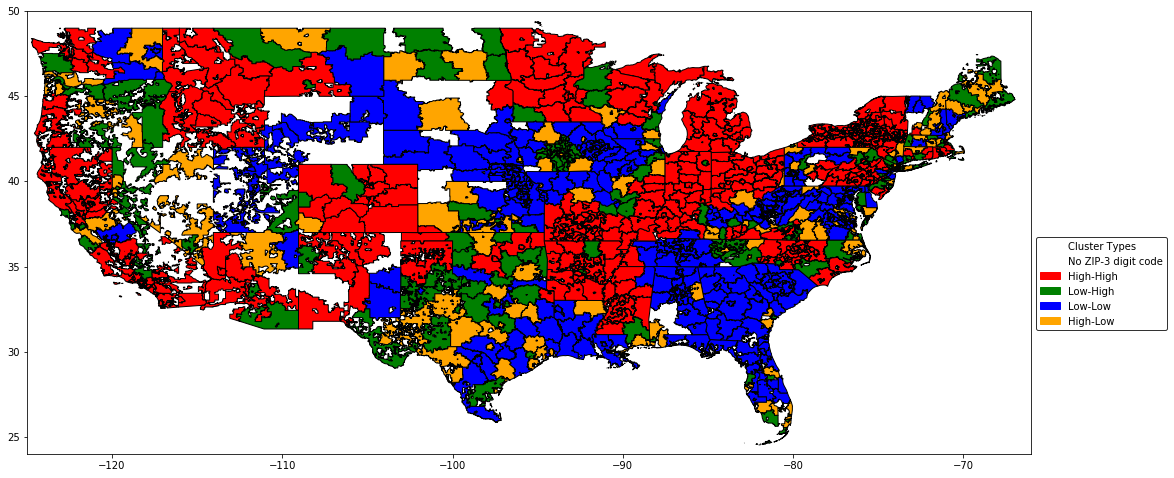

In [64]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from geopandas import GeoDataFrame


color_for_class = {
    'NaN': 'white',  # Use white to represent areas with no ZIP code information
    #0: 'grey',       # Grey for non-significant areas
    1: 'red',        # High-High
    2: 'green',      # Low-High
    3: 'blue',       # Low-Low
    4: 'orange',     # High-Low
}


df_db2_fv_age['color'] = df_db2_fv_age['quad'].map(color_for_class)


fig, ax = plt.subplots(1, figsize=(18, 9))
df_db2_fv_age.plot(ax=ax, color=df_db2_fv_age['color'], edgecolor='k')


ax.set_xlim(-125, -66)  
ax.set_ylim(24, 50)     


legend_labels = {
    'NaN': 'No ZIP-3 digit code',
    #0: 'Non-Significant',
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}


legend_handles = [mpatches.Patch(color=color_for_class[key], label=legend_labels[key], edgecolor='black')
                  for key in legend_labels]


legend = ax.legend(handles=legend_handles, title="Cluster Types", loc='upper left', bbox_to_anchor=(1, 0.5), edgecolor='black')


plt.show()

The map shows the spatial autocorrelation of the ages of patients across the US, with categorization using Moran's I statistic to establish if there are regional similarities that need to be brought forth. “High-High” (red) areas show there are areas with an elderly population, situated next to likewise areas hinting that they are areas with higher age populations, regions composed of older demographics. “Low-Low” (blue) regions denote areas that are home to patient populations youthful in composition, regions featuring younger demographics. “Low-High” (green) and “High-Low” (orange) denote neighbors with contrasting ages, clustering significantly on opposite sides of the surrounding areas, underscoring huge demographic differences. White areas, lacking sufficient ZIP-3 data, highlight areas that are missed out in the dataset. This foray into a spatial analysis is critical to analyzing patterns in demographics that become crucial for healthcare service needs and planning.

##### The relation between the treatment period and the patient was analyzed further to obtain the correlation between the two factors. It was observed that areas with older populations often coincided with regions with longer delays in treatment. This correlation suggests that specific challenges are faced by the older population in accessing timely treatment. Identifying these overlaps provided a more distinct understanding of factors affecting treatment delays, enabling more targeted approaches for these regions.

## Performing GWR (Geographical Weighted Regression)

### Dropping columns that have NA values

### Checking in states where the clsuters matched which is Newyork, Minnesto, california

In [65]:
ny=wids_geo[wids_geo['corrected_state'] == 'NY']

In [66]:
wids_data_agg_ny = ny.groupby('patient_zip3').agg({
    'treatment_pd': 'median', 
    'patient_age':'median',
    'poverty': 'median',  
    'unemployment_rate': 'median',
    'health_uninsured': 'median',
    'home_value': 'median',
    'commute_time': 'median',
    'family_size':'median',
    'labor_force_participation':'median',
    'income_household_50_to_75':'median',
    'rent_burden':'median',
    'widowed':'median',
    'geometry': 'first'  
}).reset_index()


In [67]:
print(wids_data_agg_ny.columns)

Index(['patient_zip3', 'treatment_pd', 'patient_age', 'poverty',
       'unemployment_rate', 'health_uninsured', 'home_value', 'commute_time',
       'family_size', 'labor_force_participation', 'income_household_50_to_75',
       'rent_burden', 'widowed', 'geometry'],
      dtype='object')


In [68]:
wids_data_agg_ny= gpd.GeoDataFrame(wids_data_agg_ny, geometry='geometry')
print(type(wids_data_agg_ny))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [69]:
import geopandas as gpd


centroids = wids_data_agg_ny['geometry'].centroid

# Extract longitude and latitude from the centroids
wids_data_agg_ny['longitude'] = centroids.x
wids_data_agg_ny['latitude'] = centroids.y

In [70]:

df_wids_bb_y = wids_data_agg_ny["treatment_pd"].values.reshape((-1, 1))
df_wids_bb_X = wids_data_agg_ny[["poverty","unemployment_rate","health_uninsured","commute_time","home_value","family_size","labor_force_participation","widowed","rent_burden","income_household_50_to_75"]].values
df_u = wids_data_agg_ny ["longitude"]
df_v = wids_data_agg_ny ["latitude"]
mo_coords_ny = list(zip(df_u, df_v))

In [71]:
print(len(mo_coords_ny)) 

49


In [72]:
wids_data_agg_ny

,patient_zip3,treatment_pd,patient_age,poverty,unemployment_rate,health_uninsured,home_value,commute_time,family_size,labor_force_participation,income_household_50_to_75,rent_burden,widowed,geometry,longitude,latitude
0,100,89.0,56.0,14.417073,6.602439,4.429268,1.025205e+06,31.395122,2.997073,68.809756,10.302439,28.841463,4.195122,"MULTIPOLYGON (((-74.01757 40.70684, -74.00720 ...",-73.968963,40.775714
1,101,95.5,46.0,4.150000,2.500000,5.400000,1.178137e+06,27.850000,2.845000,68.800000,4.950000,31.900000,7.850000,"MULTIPOLYGON (((-73.99395 40.75152, -73.99201 ...",-73.956358,40.775240
2,103,85.0,52.0,10.925000,5.233333,4.583333,5.681772e+05,44.791667,3.461667,59.850000,14.716667,34.941667,5.700000,"POLYGON ((-74.20997 40.51047, -74.24669 40.496...",-74.152155,40.582023
3,104,75.0,55.0,25.028000,10.856000,7.468000,4.229246e+05,44.944000,3.391600,58.956000,15.188000,41.364000,5.624000,"MULTIPOLYGON (((-73.81567 40.84886, -73.81374 ...",-73.866416,40.854281
4,105,72.0,53.0,7.851613,7.064516,3.622581,6.201969e+05,36.808475,3.212833,64.753226,9.750000,32.793333,4.490323,"MULTIPOLYGON (((-73.77195 40.94482, -73.77533 ...",-73.748116,41.270719
5,106,65.5,51.0,7.316667,5.783333,6.816667,5.516593e+05,28.016667,3.223333,69.750000,11.250000,32.860000,4.900000,"MULTIPOLYGON (((-73.79954 41.06947, -73.78869 ...",-73.758893,41.040411
6,107,64.0,56.0,9.022222,5.133333,4.477778,5.104534e+05,35.344444,3.280000,64.611111,12.222222,33.166667,6.188889,"POLYGON ((-73.91127 40.91621, -73.88356 41.003...",-73.858650,40.950695
7,108,80.0,53.5,7.575000,6.925000,5.750000,6.188105e+05,34.025000,3.352500,65.750000,12.675000,31.875000,5.600000,"MULTIPOLYGON (((-73.78625 40.88607, -73.78076 ...",-73.788772,40.923147
8,109,64.0,55.0,7.508929,5.335714,4.019643,3.994879e+05,34.019231,3.405273,67.771429,12.876786,60.233333,5.153571,"MULTIPOLYGON (((-73.90789 41.03840, -73.90268 ...",-74.251126,41.301830
9,110,63.0,58.0,6.907692,4.192308,3.400000,8.205370e+05,36.707692,3.494615,54.457143,12.469231,30.725000,11.250000,"MULTIPOLYGON (((-73.76871 40.62439, -73.74800 ...",-73.701900,40.774679


### GWR

In [73]:
#Global model~fit
>>> gwr_model = GWR(mo_coords_ny, df_wids_bb_y, df_wids_bb_X, 49)
>>> results_gwr = gwr_model.fit()
>>> print(results_gwr.aic)
>>> print(results_gwr.aicc)
>>> print(results_gwr.R2)

513.1367673429057
533.4305556642738
0.46244675382171807


### Plotting GWR for Newyork

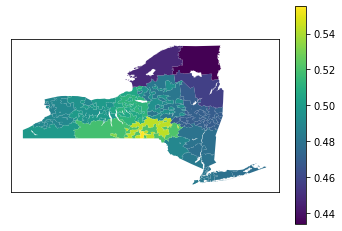

In [74]:
>>> wids_data_agg_ny["R2"] = results_gwr.localR2
>>> wids_data_agg_ny.plot("R2", legend = True)
>>> ax = plt.gca()
>>> ax.get_xaxis().set_visible(False)
>>> ax.get_yaxis().set_visible(False)
>>> plt.savefig("local_R2")
>>> plt.show()

## Minnesota

In [75]:
mn=wids_geo[wids_geo['corrected_state'] == 'MN']

In [76]:
wids_data_agg_mn = mn.groupby('patient_zip3').agg({
    'treatment_pd': 'median', 
    'patient_age':'median',
    'poverty': 'median',  
    'unemployment_rate': 'median',
    'health_uninsured': 'median',
    'home_value': 'median',
    'commute_time': 'median',
    'family_size':'median',
    'labor_force_participation':'median',
    'income_household_50_to_75':'median',
    'rent_burden':'median',
    'widowed':'median',
    'geometry': 'first'  
}).reset_index()


In [77]:
print(wids_data_agg_mn.columns)

Index(['patient_zip3', 'treatment_pd', 'patient_age', 'poverty',
       'unemployment_rate', 'health_uninsured', 'home_value', 'commute_time',
       'family_size', 'labor_force_participation', 'income_household_50_to_75',
       'rent_burden', 'widowed', 'geometry'],
      dtype='object')


In [78]:
wids_data_agg_mn= gpd.GeoDataFrame(wids_data_agg_mn, geometry='geometry')
print(type(wids_data_agg_mn))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [79]:
import geopandas as gpd


centroids = wids_data_agg_mn['geometry'].centroid

# Extract longitude and latitude from the centroids
wids_data_agg_mn['longitude'] = centroids.x
wids_data_agg_mn['latitude'] = centroids.y

In [80]:

df_wids_bb_y = wids_data_agg_mn["treatment_pd"].values.reshape((-1, 1))
df_wids_bb_X = wids_data_agg_mn[["poverty","unemployment_rate","health_uninsured","commute_time","home_value","family_size","labor_force_participation","widowed","rent_burden","income_household_50_to_75"]].values
df_u = wids_data_agg_mn ["longitude"]
df_v = wids_data_agg_mn ["latitude"]
mo_coords_mn = list(zip(df_u, df_v))

In [81]:
print(len(mo_coords_mn)) 

15


### GWR

In [82]:
#Global model~fit
>>> gwr_model = GWR(mo_coords_mn, df_wids_bb_y, df_wids_bb_X, 15)
>>> results_gwr = gwr_model.fit()
>>> print(results_gwr.aic)
>>> print(results_gwr.aicc)
>>> print(results_gwr.R2)

105.3060462397101
-642.3412716467634
0.969353477928237


### Plotting GWR for Minnesota

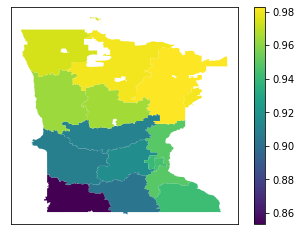

In [83]:
>>> wids_data_agg_mn["R2"] = results_gwr.localR2
>>> wids_data_agg_mn.plot("R2", legend = True)
>>> ax = plt.gca()
>>> ax.get_xaxis().set_visible(False)
>>> ax.get_yaxis().set_visible(False)
>>> plt.savefig("local_R2")
>>> plt.show()

### California

In [84]:
ca=wids_geo[wids_geo['corrected_state'] == 'CA']

In [85]:
wids_data_agg_ca = ca.groupby('patient_zip3').agg({
    'treatment_pd': 'median', 
    'patient_age':'median',
    'poverty': 'median',  
    'unemployment_rate': 'median',
    'health_uninsured': 'median',
    'home_value': 'median',
    'commute_time': 'median',
    'family_size':'median',
    'labor_force_participation':'median',
    'income_household_50_to_75':'median',
    'rent_burden':'median',
    'widowed':'median',
    'geometry': 'first'  
}).reset_index()


In [86]:
print(wids_data_agg_ca.columns)

Index(['patient_zip3', 'treatment_pd', 'patient_age', 'poverty',
       'unemployment_rate', 'health_uninsured', 'home_value', 'commute_time',
       'family_size', 'labor_force_participation', 'income_household_50_to_75',
       'rent_burden', 'widowed', 'geometry'],
      dtype='object')


In [87]:
wids_data_agg_ca= gpd.GeoDataFrame(wids_data_agg_ca, geometry='geometry')
print(type(wids_data_agg_ca))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [88]:
import geopandas as gpd


centroids = wids_data_agg_ca['geometry'].centroid

# Extract longitude and latitude from the centroids
wids_data_agg_ca['longitude'] = centroids.x
wids_data_agg_ca['latitude'] = centroids.y

In [89]:
df_wids_bb_y = wids_data_agg_ca["treatment_pd"].values.reshape((-1, 1))
df_wids_bb_X = wids_data_agg_ca[["poverty","unemployment_rate","health_uninsured","commute_time","home_value","family_size","labor_force_participation","widowed","rent_burden","income_household_50_to_75"]].values
df_u = wids_data_agg_ca ["longitude"]
df_v = wids_data_agg_ca ["latitude"]
mo_coords_ca = list(zip(df_u, df_v))

In [90]:
print(len(mo_coords_ca))

57


### GWR

In [91]:
#Global model~fit
>>> gwr_model = GWR(mo_coords_ca, df_wids_bb_y, df_wids_bb_X, 57)
>>> results_gwr = gwr_model.fit()
>>> print(results_gwr.aic)
>>> print(results_gwr.aicc)
>>> print(results_gwr.R2)

488.55807415977256
503.8960574901766
0.5558819201640592


### Plotting GWR for California

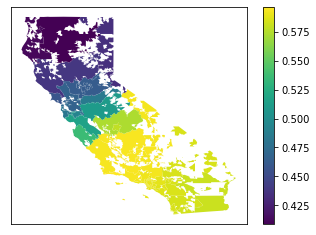

In [92]:
>>> wids_data_agg_ca["R2"] = results_gwr.localR2
>>> wids_data_agg_ca.plot("R2", legend = True)
>>> ax = plt.gca()
>>> ax.get_xaxis().set_visible(False)
>>> ax.get_yaxis().set_visible(False)
>>> plt.savefig("local_R2")
>>> plt.show()

From all the states the yellow areas are the areas where relationship between dependent variable and independent variable is strongest.

Next, from the geospatial analysis(spatial autocorrelation) of treatment_pd showed some clusters regionally where treatment_pd, taking that as our base for showing regional disparities and to add it into ML modeeling I need to get the zip codes of clsuters to add a column that is a categorical column that tells if that corresponding zip_code belongs to which category of cluster. 

In [93]:

wids_data_agg['high_high_cluster'] = (lisa.q == 1) & (lisa.p_sim < 0.05)
wids_data_agg['low_high_cluster'] = (lisa.q == 2) & (lisa.p_sim < 0.05)
wids_data_agg['low_low_cluster'] = (lisa.q == 3) & (lisa.p_sim < 0.05)
wids_data_agg['high_low_cluster'] = (lisa.q == 4) & (lisa.p_sim < 0.05)
wids_data_agg['ns'] = lisa.p_sim >= 0.05
# Extract zip_3 codes for high-high clusters
high_high_zip_3 = wids_data_agg[wids_data_agg['high_high_cluster']]['patient_zip3']
low_high_zip_3 = wids_data_agg[wids_data_agg['low_high_cluster']]['patient_zip3']

low_low_zip_3 = wids_data_agg[wids_data_agg['low_low_cluster']]['patient_zip3']
high_low_zip_3 = wids_data_agg[wids_data_agg['high_low_cluster']]['patient_zip3']
ns_zip_3 = wids_data_agg[wids_data_agg['ns']]['patient_zip3']
# Print the zip_3 codes of the high-high cluster s
print("High-High Cluster ZIP-3 Codes:")
print(high_high_zip_3)
print("low-High Cluster ZIP-3 Codes:")
print(low_high_zip_3)
print("low-low Cluster ZIP-3 Codes:")
print(low_low_zip_3 )
print("High-low Cluster ZIP-3 Codes:")
print(high_low_zip_3)
print("ns Cluster ZIP-3 Codes:")
print(ns_zip_3)


High-High Cluster ZIP-3 Codes:
0      006
1      007
17     025
43     054
45     058
93     118
94     119
210    243
308    350
309    351
310    352
311    354
312    355
313    356
314    357
315    358
316    359
317    360
319    362
323    368
448    500
457    510
460    514
461    515
501    565
503    567
509    580
510    581
511    582
512    584
763    900
764    902
771    910
773    912
776    915
777    916
778    917
795    935
820    967
Name: patient_zip3, dtype: object
low-High Cluster ZIP-3 Codes:
214    247
321    365
451    503
453    505
456    508
458    511
463    521
497    561
502    566
513    585
515    587
567    645
597    680
630    725
639    736
648    746
754    881
841    990
846    995
Name: patient_zip3, dtype: object
low-low Cluster ZIP-3 Codes:
22     030
24     032
31     040
78     103
194    227
      ... 
729    840
731    843
732    844
734    846
848    999
Name: patient_zip3, Length: 84, dtype: object
High-low Cluster ZIP-3 Codes:
485    

In [94]:
# Print the zip_3 codes of the low-low cluster
print("Low-Low Cluster ZIP-3 Codes:")
for zip_code in low_low_zip_3:
    print(zip_code)

Low-Low Cluster ZIP-3 Codes:
030
032
040
103
227
229
268
320
323
390
391
397
423
424
460
461
470
474
475
476
477
530
531
532
540
541
544
545
547
548
549
550
558
577
586
595
596
597
599
622
629
630
633
634
635
636
647
648
650
652
653
654
655
656
657
658
668
674
729
743
745
749
758
759
769
773
786
793
795
798
810
811
812
814
815
816
829
832
834
840
843
844
846
999


### Adding these pincodes to the dataset to do ML modelling

In [95]:
train_1=pd.read_csv('train_1.csv')

In [96]:
train_1['patient_zip3'] = train_1['patient_zip3'].astype(str)

In [97]:
import pandas as pd

# Define the lists for each type of cluster
high_high_cluster_zip_3 = ['6', '7', '9', '25', '54', '56', '58', '115', '118', '119', '243', '350', '351', '352', '354', '355', '356', '357', '358', '359', '360', '362', '368', '374', '500', '510', '514', '515', '565', '567', '580', '581', '582', '584', '900', '902', '910', '912', '915', '916', '917', '935', '967']
low_high_cluster_zip_3 = ['247', '365', '503', '505', '508', '511', '521', '561', '566', '585', '587', '645', '680', '725', '746', '881', '990', '995']
high_low_cluster_zip_3 = ['325', '546', '660', '673', '678', '707', '826', '835', '845', '991', '992', '996']
low_low_cluster_zip_3 = ['30', '32', '40', '103', '227', '229', '230', '268', '320', '323', '390', '391', '397', '423', '424', '460', '461', '470', '474', '475', '476', '477', '530', '531', '540', '541', '544', '545', '547', '548', '549', '550', '558', '577', '586', '595', '596', '597', '599', '629', '630', '633', '634', '635', '636', '647', '648', '650', '652', '653', '654', '655', '656', '657', '658', '668', '674', '691', '743', '745', '749', '758', '759', '769', '773', '786', '793', '795', '798', '810', '811', '812', '814', '815', '816', '829', '832', '834', '840', '843', '844', '846', '999']

# Function to categorize zip_3 codes
def categorize_zip(zip_code):
    if zip_code in high_high_cluster_zip_3:
        return 1
    elif zip_code in low_high_cluster_zip_3:
        return 2
    elif zip_code in high_low_cluster_zip_3:
        return 4
    elif zip_code in low_low_cluster_zip_3:
        return 3
    else:
        return 0  # Not in any significant cluster


train_1['geospatial_category'] = train_1['patient_zip3'].apply(categorize_zip)

print(train_1[['patient_zip3', 'geospatial_category']])


      patient_zip3  geospatial_category
0              917                    1
1              451                    0
2              773                    3
3              928                    0
4              112                    0
...            ...                  ...
27669          653                    3
27670          462                    0
27671          769                    3
27672          853                    0
27673          923                    0

[27674 rows x 2 columns]


### Checking if the newly added column has strong relationship with target variable to get evidence if that particular column would be useful for modelling or not. In order to do that "ANOVA testing "is used

In [98]:
import pandas as pd
import scipy.stats as stats



groups = [group['treatment_pd'].dropna() for name, group in train_1.groupby('geospatial_category')]


f_value, p_value = stats.f_oneway(*groups)

print("F-value:", f_value)
print("p-value:", p_value)

F-value: 19.90779127794434
p-value: 2.201687897071996e-16


Since, p value is less than 0.05 it tells that this column would be very useful for ML modeling

In [99]:
train_1.to_csv('train_upd.csv', index=False)

In [100]:
train_ohe=pd.read_csv('train_upd.csv')

### Performing one-hot encoding 

In [101]:
import pandas as pd


encoded_columns = pd.get_dummies(train_ohe['geospatial_category'], prefix='geospatial_category')

train_ohe = train_ohe.join(encoded_columns)


train_ohe.drop('geospatial_category', axis=1, inplace=True)

print(train_ohe.head())  


   patient_id patient_race          payer_type patient_state  patient_zip3  \
0      994155        Asian          COMMERCIAL            CA           917   
1      154389          NaN  MEDICARE ADVANTAGE            OH           451   
2      387343          NaN          COMMERCIAL            TX           773   
3      921275     Hispanic            MEDICAID            CA           928   
4      803454          NaN          COMMERCIAL            NY           112   

   patient_age patient_gender   bmi breast_cancer_diagnosis_code  \
0           46              F  27.0                       C50811   
1           63              F   NaN                       C50412   
2           53              F   NaN                       C50212   
3           50              F   NaN                         1749   
4           39              F  18.0                         1749   

                        breast_cancer_diagnosis_desc  ...  limited_english  \
0  Malignant neoplasm of ovrlp sites of righ

### exporting this dataset for Modeling

In [102]:
train_ohe.to_csv('train_upd_dum.csv', index=False)